In [24]:
import uproot
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import plotly.express as px
import plotly.graph_objects as go

In [2]:
r_inn_all = [
    1500,
    1594.11,
    1970.56,
]
r_out_all = [
    1594.11,
    1970.56,
    2017.62,
]
n_pixels_all = [
    256,
    256,
    128
]
ilayer = 1
nPixelsMax = 256

r_inn = r_inn_all[ilayer]
r_out = r_out_all[ilayer]
cellMergeFactor = n_pixels_all[ilayer] / nPixelsMax
minDEta = 4 * 1.5 / nPixelsMax
minDPhi = 2 * np.pi / n_pixels_all[ilayer]
previous_layers_delta_r = r_out_all[ilayer] - r_inn_all[ilayer - 1] if ilayer > 0 else 0
direction = 1

theta_min = 2 * np.atan(np.exp(-1 * 3))
length = 4063.84 / np.tan(theta_min)

In [3]:
NumberOfPixel = nPixelsMax

In [4]:
vector_z = np.array([0, 0, -direction])
subtrahendTranslationZ = - direction * 0.1 * length
vecSubtrahendTranslationZ = np.array([0, 0, subtrahendTranslationZ])

depth = r_out -r_inn
nCellsPerDirection = 0.25 * NumberOfPixel

theta_all = np.zeros(int(nCellsPerDirection))
d_eta = minDEta
d_phi = minDPhi

In [5]:
for i in range(len(theta_all)):
    theta_all[i] = 0.5 * np.pi - 2 * np.atan(np.exp(-1 * (i + 1) * d_eta))

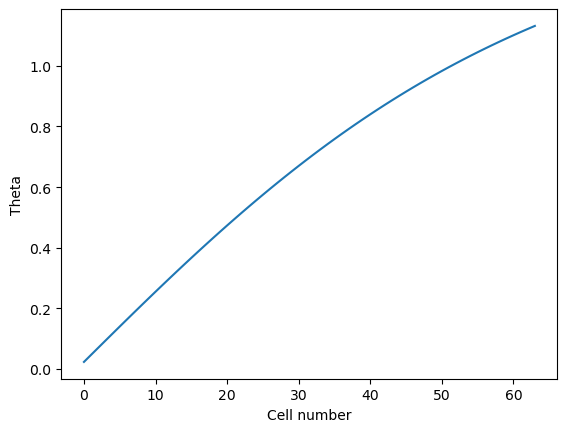

In [6]:
plt.plot(theta_all)
plt.xlabel('Cell number')
plt.ylabel('Theta')
plt.show()

In [7]:
class Tube:
    def __init__(self, name, RMin, RMax, Dz, SPhi, DPhi):
        self.name = name
        self.RMin = RMin
        self.RMax = RMax
        self.Dz = Dz
        self.SPhi = SPhi
        self.DPhi = DPhi

class CutTube(Tube):
    def __init__(self, name, RMin, RMax, Dz, SPhi, DPhi, pLowNorm, pHightNorm):
        super().__init__(name, RMin, RMax, Dz, SPhi, DPhi)
        self.pLowNorm = pLowNorm
        self.pHightNorm = pHightNorm

class SubstractionSolid:
    def __init__(self, solid1, solid2, transVector):
        self.solid1 = solid1
        self.solid2 = solid2
        self.transVector = transVector


In [8]:

cells = []
r_inn2 = r_inn
for i in range(int(nCellsPerDirection)):

    theta_rear = 0
    if (i > 0):
        theta_rear = theta_all[i - 1]
    theta_front = theta_all[i]

    if i == 1:
        r_inn2 = r_inn + previous_layers_delta_r * ( np.cos( theta_rear ) - 1.0 );
    elif i > 1:
        r_inn2 = r_inn + previous_layers_delta_r * ( np.cos( theta_rear ) - np.cos( theta_all[i - 2] ) );
    r_out2 = r_inn2 + depth * np.cos( theta_rear ); # 1 / cosh( eta )  scaling. Note that the polar angle is ( pi / 2 - theta_rear ) .
    print(r_inn2, r_out2)

    vy_rear = -np.sin( theta_rear );
    vz_rear =  np.cos( theta_rear );
    vy_front = -np.sin( theta_front );
    vz_front =  np.cos( theta_front );		
    vector_rear = np.array([0.0, vy_rear, direction * vz_rear])
    vector_front = np.array([0.0, vy_front, direction * vz_front])
    
    if i == 0:
        cell_tube_subtrahend = Tube(
            "Barrel_Cell_subtrahend",
            0.9 * r_inn2,
            1.1 * r_out2,
            0.5 * length + np.abs( subtrahendTranslationZ ),
            ( np.pi - d_phi ) / 2,
            2 * np.pi
        )
    else:
        cell_tube_subtrahend = CutTube(
                        "Barrel_Cell_subtrahend",
                        0.9 * r_inn2,
                        1.1 * r_out2,
                        0.5 * length + np.abs( subtrahendTranslationZ ),
                        ( np.pi - d_phi ) / 2,
                        2 * np.pi,
                        vector_rear if direction == 1 else vector_z,
                        vector_z if direction == 1 else vector_rear
        )
    cell_tube_minuend    = CutTube( 
                    "Barrel_Cell_minuend",
                        r_inn2, 
                        r_out2,
                        0.5 * length,
                        ( np.pi - d_phi ) / 2,
                        d_phi,
                        vector_front if direction == 1 else vector_z,
                        vector_z if direction == 1 else vector_front
    )
    new_cell = SubstractionSolid(
                                cell_tube_minuend,
                                cell_tube_subtrahend,
                                vecSubtrahendTranslationZ )

    cells.append( new_cell )

1594.11 1970.56
1593.9807864107433 1970.3274149901474
1593.7227138130638 1969.759511796854
1593.46570258635 1968.9870599007922
1593.2104524356043 1968.0121678752234
1592.9576513549341 1966.8374829807249
1592.7079711462375 1965.4661737300382
1592.462063136095 1963.9019092246197
1592.2205541407588 1962.148835511264
1591.984042724337 1960.2115492384514
1591.7530957896931 1958.095068918118
1591.5282455353974 1955.8048041190254
1591.3099868054026 1953.3465229325827
1591.09877485117 1950.7263180608115
1590.895023518931 1947.9505718792477
1590.6991038677531 1945.025920825094
1590.511343217312 1941.9592194532936
1590.332024617847 1938.7575044907476
1590.161386728839 1935.4279592021976
1589.9996240876171 1931.9778783609236
1589.8468877444288 1928.4146340939642
1589.7032862365695 1924.7456428457033
1589.5688868709958 1920.9783336760374
1589.443717282458 1917.1201180805745
1589.3277672325419 1913.1783614909832
1589.220990614125 1909.1603565843297
1589.123307625547 1905.0732985014754
1589.03460707

In [9]:
1753.2117876843304

1753.2117876843304

In [10]:
r_inn2

np.float64(1589.761460271433)

In [11]:
r_out2

np.float64(1753.2117876843304)

In [12]:
def cylinder(
    r,
    dz,
    starting_phi,
    dphi,
    n_points = 50,
):
    theta = np.linspace(starting_phi, starting_phi + dphi, n_points)
    v = np.linspace(-dz, dz, n_points)
    theta, v = np.meshgrid(theta, v)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = v
    return x, y, z

In [13]:
def plane(normal_vec):
    x = np.linspace(-3000, 3000, 100)
    y = np.linspace(-3000, 3000, 100)
    x, y = np.meshgrid(x, y)
    z = (-normal_vec[0] * x - normal_vec[1] * y) / normal_vec[2]
    return x, y, z

In [14]:
x, y, z = cylinder(1, 0.5, 0, 2 * np.pi)

In [15]:
def boundary_circle(r, h, nt=100):
    """
    r - boundary circle radius
    h - height above xOy-plane where the circle is included
    returns the circle parameterization
    """
    theta = np.linspace(0, 2*np.pi, nt)
    x= r*np.cos(theta)
    y = r*np.sin(theta)
    z = h*np.ones(theta.shape)
    return x, y, z

In [15]:
def tube_to_plotly(
    tube,
    n_points=100,
    minuend=False
):
    if minuend:
        inner_colorscale = [[0, 'green'], [1, 'green']]
        outer_colorscale = [[0, 'yellow'], [1, 'yellow']]
    else:
        inner_colorscale = [[0, 'blue'], [1, 'blue']]
        outer_colorscale = [[0, 'red'], [1, 'red']]
    x, y, z = cylinder(
        r=tube.RMin,
        dz=tube.Dz,
        starting_phi=tube.SPhi,
        dphi=tube.DPhi,
        n_points=n_points,
    )
    cyl_inner = go.Surface(
        x=x,
        y=y,
        z=z,
        colorscale=inner_colorscale,
        showscale=False,
        opacity=0.5,
    )
    x, y, z = cylinder(
        r=tube.RMax,
        dz=tube.Dz,
        starting_phi=tube.SPhi,
        dphi=tube.DPhi,
        n_points=n_points,
    )
    cyl_outer = go.Surface(
        x=x,
        y=y,
        z=z,
        colorscale=outer_colorscale,
        showscale=False,
        opacity=0.5,
    )
    if isinstance(tube, CutTube):
        x_upper, y_upper, z_upper = plane(tube.pHightNorm)
        cut_upper_plane = go.Surface(
            x=x_upper,
            y=y_upper,
            z=z_upper + tube.Dz,
            colorscale=[[0, 'black'], [1, 'black']],
            showscale=False,
            opacity=0.5,
        )
        x_lower, y_lower, z_lower = plane(tube.pLowNorm)
        cut_lower_plane = go.Surface(
            x=x_lower,
            y=y_lower,
            z=z_lower - tube.Dz,
            colorscale=[[0, 'black'], [1, 'black']],
            showscale=False,
            opacity=0.5,
        )
        return cyl_inner, cyl_outer, cut_upper_plane, cut_lower_plane
    return cyl_inner, cyl_outer

In [16]:
colorscale = [[0, 'blue'],
             [1, 'blue']]

In [163]:
layout = go.Layout(scene_xaxis_visible=True, scene_yaxis_visible=True, scene_zaxis_visible=True, scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectratio=dict(x=1, y=1, z=1),
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        ),)
fig =  go.Figure(data=[*tube_to_plotly(cells[4].solid1, minuend=True)], layout=layout, )
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [17]:
print(cells[63].solid1.pHightNorm, cells[63].solid1.pLowNorm)

[ 0  0 -1] [ 0.         -0.90514825  0.42509603]


In [16]:
def get_cell_data(i):

    theta_rear = 0
    if (i > 0):
        theta_rear = theta_all[i - 1]
    theta_front = theta_all[i]

    if i == 1:
        r_inn2 = r_inn + previous_layers_delta_r * ( np.cos( theta_rear ) - 1.0 );
    elif i > 1:
        r_inn2 = r_inn + previous_layers_delta_r * ( np.cos( theta_rear ) - np.cos( theta_all[i - 2] ) );

    r_out2 = r_inn2 + depth * np.cos( theta_rear ); # 1 / cosh( eta )  scaling. Note that the polar angle is ( pi / 2 - theta_rear ) .

    vy_rear = -np.sin( theta_rear );
    vz_rear =  np.cos( theta_rear );
    vy_front = -np.sin( theta_front );
    vz_front =  np.cos( theta_front );		
    vector_rear = np.array([0.0, vy_rear, direction * vz_rear])
    vector_front = np.array([0.0, vy_front, direction * vz_front])
    
    return r_inn2, r_out2, vector_front, vector_rear, vector_z

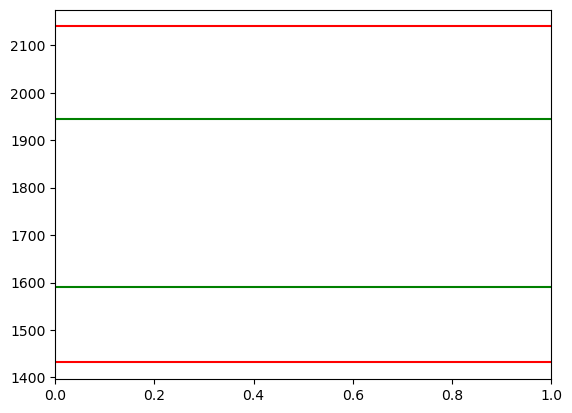

In [19]:
r_inn2, r_out2, vector_front, vector_rear, vector_z = get_cell_data(15)

plt.axhline(y=0.9 * r_inn2, color='r', linestyle='-')
plt.axhline(y=1.1 * r_out2, color='r', linestyle='-')
plt.axhline(y=r_inn2, color='g', linestyle='-')
plt.axhline(y=r_out2, color='g', linestyle='-')

# plot clipping planes
plane_front = plane(vector_front)
plane_rear = plane(vector_rear)

# plt.plot(plane_front[2], plane_front[0], color='b')

plt.show()

In [95]:
def get_layers():
    r_inn_all = [
    1500,
    1594.11,
    1970.56,
    ]
    r_out_all = [
        1594.11,
        1970.56,
        2017.62,
    ]
    nPixelsMax = 256
    
    r_in_dict = {}
    r_out_dict = {}
    for ilayer in range(0, 3):
        r_inn = r_inn_all[ilayer]
        r_out = r_out_all[ilayer]
        depth = r_out - r_inn
        minDEta = 4 * 1.5 / nPixelsMax
        previous_layers_delta_r = r_out_all[ilayer] - r_inn_all[ilayer - 1] if ilayer > 0 else 0

        theta_all = np.zeros(int(nCellsPerDirection))
        d_eta = minDEta
        for i in range(len(theta_all)):
            theta_all[i] = 0.5 * np.pi - 2 * np.atan(np.exp(-1 * (i + 1) * d_eta))

        new_r_inn = []
        new_r_out = []
        for iCell in range(len(theta_all)):
            theta_rear = 0
            if (iCell > 0):
                theta_rear = theta_all[iCell - 1]
            if iCell == 0:
                r_inn2 = r_inn
            if iCell == 1:
                r_inn2 = r_inn + previous_layers_delta_r * ( np.cos( theta_rear ) - 1.0 )
            elif iCell > 1:
                r_inn2 = r_inn + previous_layers_delta_r * ( np.cos( theta_rear ) - np.cos( theta_all[iCell - 2] ) )
            r_out2 = r_inn2 + depth * np.cos( theta_rear )
            new_r_inn.append(r_inn2)
            new_r_out.append(r_out2)
        
        r_in_dict[ilayer] = new_r_inn
        r_out_dict[ilayer] = new_r_out
    return r_in_dict, r_out_dict
        

In [96]:
r_in_dict, r_out_dict = get_layers()

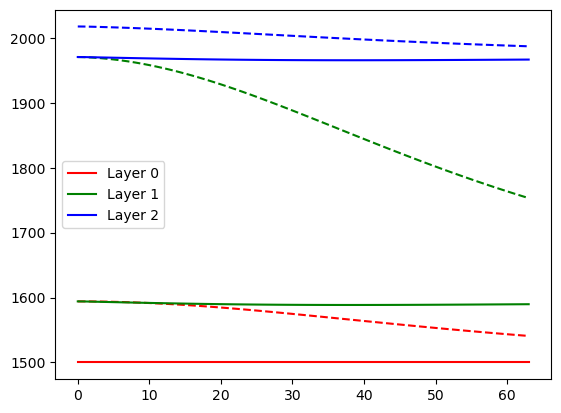

In [97]:
colors = {
    0: 'r',
    1: 'g',
    2: 'b'
}

for key, value in r_in_dict.items():
    plt.plot(value, label=f'Layer {key}', c=colors[key])
    plt.plot(r_out_dict[key], linestyle='dashed', c=colors[key])
plt.legend()

In [98]:
r_inn_all = [
    1500,
    1594.11,
    1970.56,
]
r_out_all = [
    1594.11,
    1970.56,
    2017.62,
]

In [156]:
def get_layers_old():

    nPixelsMax = 256
    r_in_dict = {}
    r_out_dict = {}
    previous_layers_delta_r = 0
    
    for ilayer in range(0, 3):
        r_inn = float(r_inn_all[ilayer])
        r_out = float(r_out_all[ilayer])
        depth = r_out - r_inn
        minDEta = 4 * 1.5 / nPixelsMax

        nCellsPerDirection = 0.25 * nPixelsMax

        theta_all = np.zeros(int(nCellsPerDirection))
        d_eta = minDEta
        for i in range(len(theta_all)):
            theta_all[i] = 0.5 * np.pi - 2 * np.atan(np.exp(-1 * (i + 1) * d_eta))

        new_r_inn = []
        new_r_out = []
        r_inn2 = r_inn
        for iCell in range(len(theta_all)):
            theta_rear = 0
            if (iCell > 0):
                theta_rear = theta_all[iCell - 1]
            if iCell == 1:
                r_inn2 = r_inn2 + previous_layers_delta_r * ( np.cos( theta_rear ) - 1.0 )
            elif iCell > 1:
                r_inn2 = r_inn2 + previous_layers_delta_r * ( np.cos( theta_rear ) - np.cos( theta_all[iCell - 2] ) )
            r_out2 = r_inn2 + depth * np.cos( theta_rear )
            new_r_inn.append(r_inn2)
            new_r_out.append(r_out2)
        
        r_in_dict[ilayer] = np.array(new_r_inn)
        r_out_dict[ilayer] = np.array(new_r_out)
        previous_layers_delta_r += r_out_all[ilayer] - r_inn_all[ilayer]
    return r_in_dict, r_out_dict
        

In [157]:
r_in_old_dict, r_out_old_dict = get_layers_old()

In [158]:
import matplotlib as mpl

Text(0, 0.5, 'Radius')

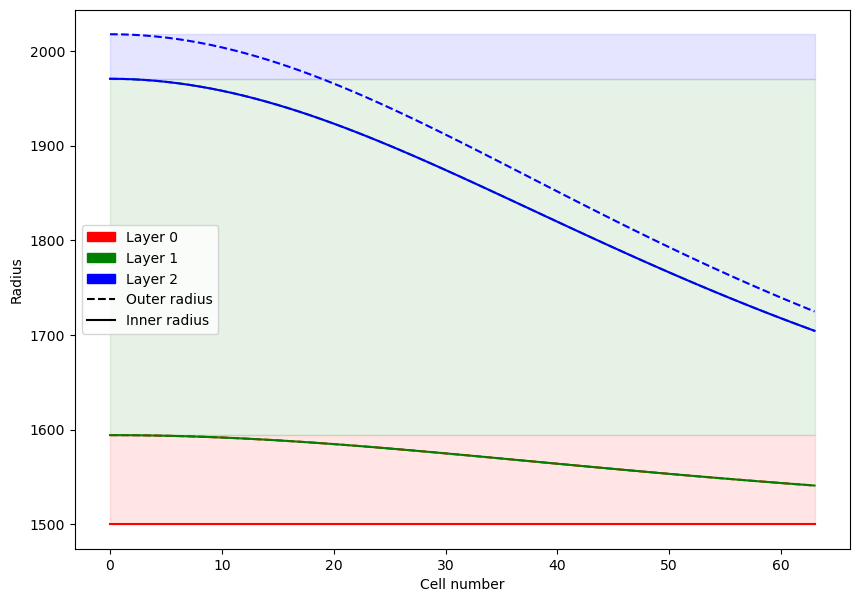

In [159]:
colors = {
    0: 'r',
    1: 'g',
    2: 'b'
}

fig = plt.figure(figsize=(10, 7))
for key, value in r_in_old_dict.items():
    plt.plot(value, label=f'Layer {key}', c=colors[key])
    plt.plot(r_out_old_dict[key], linestyle='dashed', c=colors[key])
    # plt.plot((r_out_old_dict[key] - value) / 2 + value, linestyle='dotted', c=colors[key])
for i, (r_in, r_out) in enumerate(zip(r_inn_all, r_out_all)):
    patch = mpl.patches.Rectangle((0, r_in), 63, r_out - r_in, color=colors[i], alpha=0.1)
    plt.gca().add_patch(patch)

handles = []
for i, color in colors.items():
    handles.append(mpl.patches.Patch(color=color, label=f'Layer {i}'))

handles.append(mpl.lines.Line2D([0], [0], color='black', linestyle='dashed', label='Outer radius'))
handles.append(mpl.lines.Line2D([0], [0], color='black', label='Inner radius'))
plt.legend(handles=handles)
plt.xlabel('Cell number')
plt.ylabel('Radius')

In [160]:
with open("/storage/agrp/dmitrykl/cocoa/cocoa-hep/notebooks/vtx_info.csv") as f:
    df = pd.read_csv(f)

In [161]:
df

layer  nvtx  cell          x        y        z
0         1    10     0  19.562200  1593.99  4363.89
1         1    10     0 -19.562200  1593.99  4363.89
2         1    10     0  18.407300  1499.89  4361.68
3         1    10     0 -18.407300  1499.89  4361.68
4         1    10     0  19.562200  1593.99  4326.67
...     ...   ...   ...        ...      ...      ...
1915      3    10    63   0.382082  1724.61  7904.24
1916      3    10    63 -21.165200  1724.61  7904.24
1917      3    10    63  20.914500  1704.18  7861.86
1918      3    10    63   0.382082  1704.18  7861.86
1919      3    10    63 -20.914500  1704.18  7861.86

[1920 rows x 6 columns]

In [162]:
mask = (df['x'] + df['y'] + df['z']) != 0
df = df[mask]
x = df['x']
y = df['y']
z = df['z']
layer = df['layer']
cell_idx = df['cell']

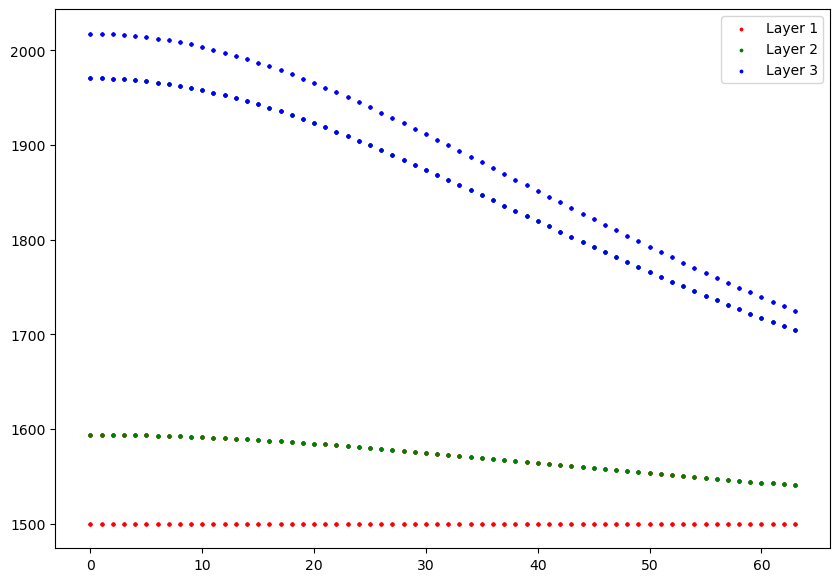

In [163]:
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(1, 4):
    mask = layer == i
    plt.scatter(cell_idx[mask], y[mask], label=f'Layer {i}', c=colors[i-1], s=3)
# plt.ylim(0, 30)
plt.legend()

- ECAL: Layer 0 r_inn 1500 r_out 1594.11
- ECAL: Layer 1 r_inn 1594.11 r_out 1970.56
- ECAL: Layer 2 r_inn 1970.56 r_out 2017.62
- HCAL: Layer 0 r_inn 2097.62 r_out 2496.17
- HCAL: Layer 1 r_inn 2496.17 r_out 3585.57
- HCAL: Layer 2 r_inn 3585.57 r_out 4063.84

In [164]:
length = 4063.84 / np.tan(theta_min)

Text(0, 0.5, 'Radius')

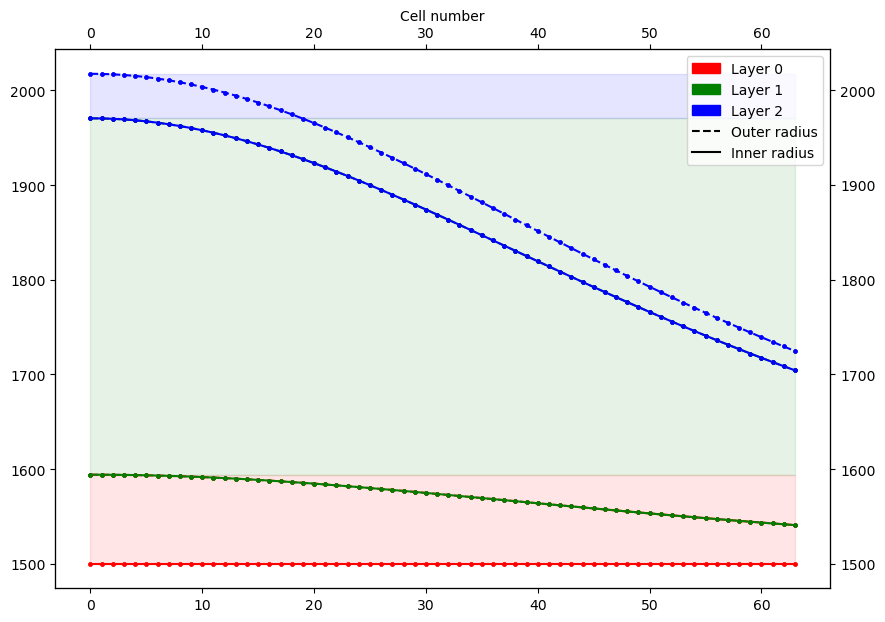

In [165]:
colors = {
    0: 'r',
    1: 'g',
    2: 'b'
}

fig = plt.figure(figsize=(10, 7))
for key, value in r_in_old_dict.items():
    plt.plot(value, label=f'Layer {key}', c=colors[key])
    plt.plot(r_out_old_dict[key], linestyle='dashed', c=colors[key])
    # plt.plot((r_out_old_dict[key] - value) / 2 + value, linestyle='dotted', c=colors[key])
for i, (r_in, r_out) in enumerate(zip(r_inn_all, r_out_all)):
    patch = mpl.patches.Rectangle((0, r_in), 63, r_out - r_in, color=colors[i], alpha=0.1)
    plt.gca().add_patch(patch)

handles = []
for i, color in colors.items():
    handles.append(mpl.patches.Patch(color=color, label=f'Layer {i}'))

plt.twinx()
plt.twiny()
for i in range(1, 4):
    mask = layer == i
    plt.scatter(cell_idx[mask], y[mask], label=f'Layer {i}', c=colors[i-1], s=5, alpha=0.5)

handles.append(mpl.lines.Line2D([0], [0], color='black', linestyle='dashed', label='Outer radius'))
handles.append(mpl.lines.Line2D([0], [0], color='black', label='Inner radius'))
plt.legend(handles=handles)
plt.xlabel('Cell number')
plt.ylabel('Radius')

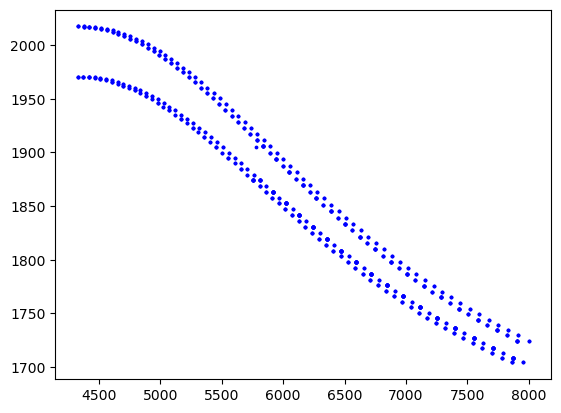

In [63]:
mask = layer == 3
plt.scatter(z[mask], y[mask], label=f'Layer {i}', c=colors[2], s=3)